## Data
***
#### Import Libraries

In [184]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import holidays
from workalendar.europe import UnitedKingdom
import warnings

warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (18,7)

In [185]:
def get_yf_data(ticker:str, start:str, end:str, column:str = None):
    """
    Retrieve historical financial data for a given stock ticker symbol within a specified date range.

    Parameters:
        ticker (str, required): The ticker symbol fo the stock you want to return
        start  (str, required): The start date of the historical data range in 'YYYY-MM-DD' format.
        end    (str, required): The end date of the historical data range in 'YYYY-MM-DD' format.
        column (str, optional): The specific data column to retrieve (e.g., 'Open', 'Close').
                                If None (default), returns a DataFrame with all available columns.
    Returns:
        pandas.DataFrame: returns a pandas DataFrame containing data for that specific column or all columns.
    """
    
    if column == None:
        return yf.Ticker(ticker).history(start=start, end=end)
    else:
        return yf.Ticker(ticker).history(start=start, end=end)[column]

In [186]:
stocks = {'HWG.L' : None, # HWG.L  - Harworth Group PLC
          'BLND.L': None, # BLND.L - British Land Company PLC
          'SGRO.L': None, # SGRO.L - Segro PLC
          'BOOT.L': None, # BOOT.L - Henry Boot PLC
          'ASLI.L': None, # ASLI.L - Aberdeen Standard European Logistics Income PLC
          'DLN.L' : None} # DLN.L  - Derwent London PLC

palette = {'HWG.L' :'#002d61',
          'BLND.L': '#017FAC', 
          'SGRO.L': '#CC171F', 
          'BOOT.L': '#0026d1', 
          'ASLI.L': '#50C878',       
          'DLN.L' : '#6a6a6a'} 

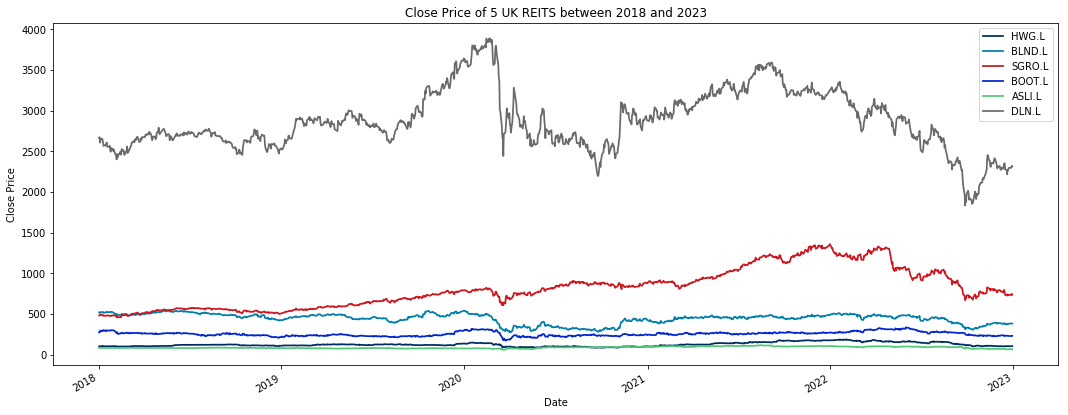

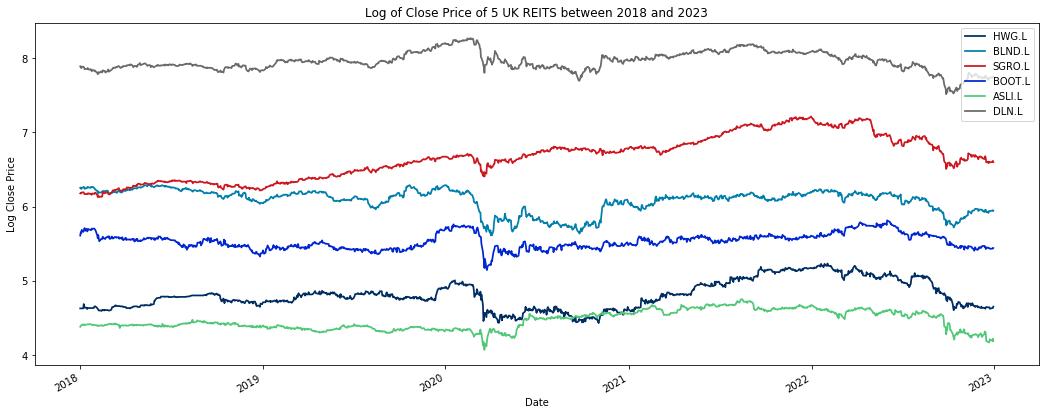

In [187]:
for i in stocks.keys():
    stocks[i] = get_yf_data(i, '2018-01-01', '2022-12-31', 'Close')
    #stocks[i] = np.log(stocks[i])
    stocks[i].plot(color=palette[i], linewidth=1.75)
    
plt.legend(stocks)
plt.title('Close Price of 5 UK REITS between 2018 and 2023')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

log_stocks = stocks.copy()
for i in log_stocks.keys():
    log_stocks[i] = np.log(stocks[i])
    log_stocks[i].plot(color=palette[i], linewidth=1.75)

plt.legend(log_stocks)
plt.title('Log of Close Price of 5 UK REITS between 2018 and 2023')
plt.xlabel('Date')
plt.ylabel('Log Close Price')
plt.show()

In [188]:
#df.isna().sum()
stocks['SGRO.L'][stocks['SGRO.L'].isnull()]

Series([], Name: Close, dtype: float64)

In [189]:
missing_dates = pd.date_range(start='2018-01-01', end='2022-12-31').difference(df.index)
print('%s missing dates, including weekends and bank holidays.' % len(missing_dates))

uk = UnitedKingdom()
missing = 0
for d in missing_dates:
    if d.weekday() < 5:
        if uk.is_working_day(d):
            missing += 1

print('%s missing working day dates.' % missing)

563 missing dates, including weekends and bank holidays.
0 missing working day dates.


### Inflation

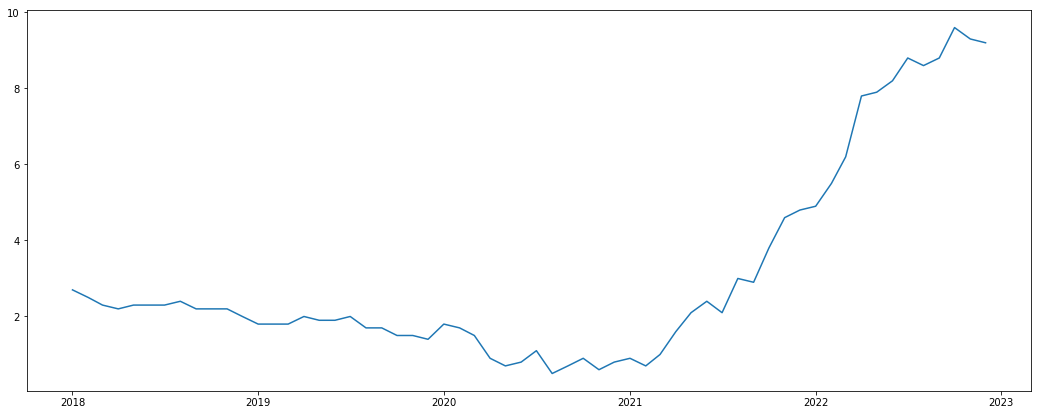

In [193]:
inflation_df = pd.read_csv('series-160823 - CPIH.csv')[181:].reset_index()
inflation_df['Title'] = inflation_df['Title'].apply(lambda x: datetime.strftime(datetime.strptime(x, '%Y %b'), '%Y-%m-%d'))
inflation_df = inflation_df.rename(columns={'Title': 'Month', 'CPIH ANNUAL RATE 00: ALL ITEMS 2015=100': 'CPIH Annual Rate'})
inflation_df['Month'] = pd.to_datetime(inflation_df['Month'])
inflation_df['CPIH Annual Rate'] = pd.to_numeric(inflation_df['CPIH Annual Rate'])
#inflation_df.index = inflation_df['Date']
del inflation_df['index']
#del inflation_df['Date']
inflation_df = inflation_df[(inflation_df['Month']>='2018-01-01') & (inflation_df['Month']<='2022-12-31')]
plt.plot(inflation_df['Month'], inflation_df['CPIH Annual Rate'])
plt.show()

### House Price Index

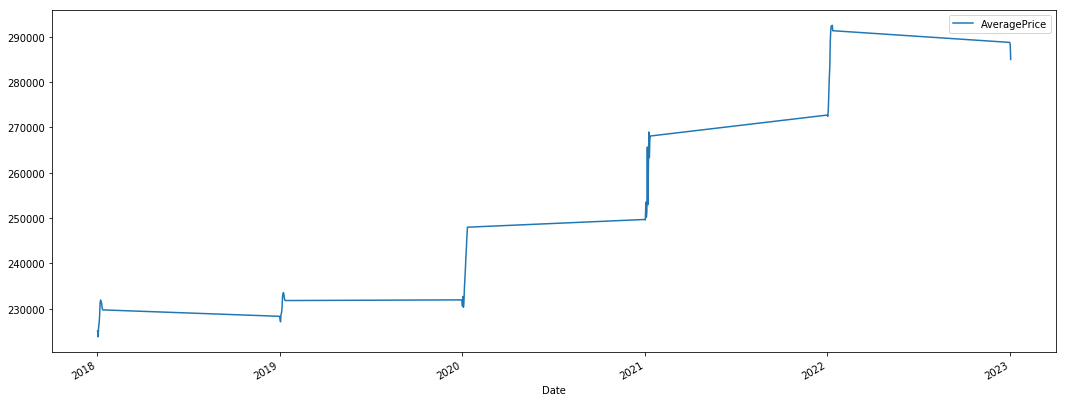

In [168]:
hpi_df = pd.read_csv('UK-HPI-full-file-2023-03.csv')
hpi_df = hpi_df[hpi_df['RegionName']=='United Kingdom'] 
hpi_df = hpi_df[['Date', 'AveragePrice']]

hpi_df['Date'] = pd.to_datetime(hpi_df['Date'])
hpi_df['AveragePrice'] = pd.to_numeric(hpi_df['AveragePrice'])
hpi_df.index = hpi_df['Date']
del hpi_df['Date']

hpi_df = hpi_df[hpi_df.index > '2018-01-01']

hpi_df.plot()

### BoE Rates

In [176]:
boe_df = pd.read_csv('Bank Rate history and data  Bank of England Database.csv')
boe_df['Date Changed'] = pd.to_datetime(boe_df['Date Changed'])
boe_df

,Date Changed,Rate
0,2023-08-03,5.25
1,2023-06-22,5.00
2,2023-05-11,4.50
3,2023-03-23,4.25
4,2023-02-02,4.00
...,...,...
247,1975-03-10,10.25
248,1975-02-17,10.50
249,1975-02-10,10.75
250,1975-01-27,11.00


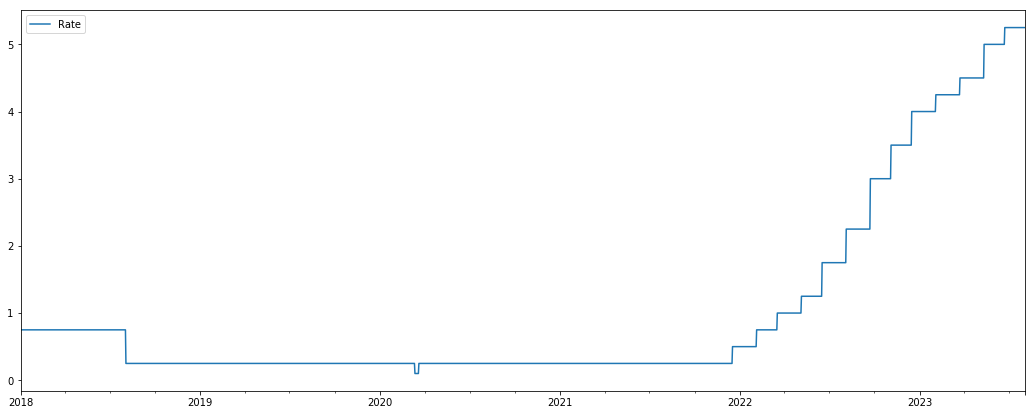

In [177]:
full_date_range = pd.date_range(start=boe_df['Date Changed'].min(), end=boe_df['Date Changed'].max())
missing_dates = full_date_range.difference(boe_df['Date Changed'])

boe_df = boe_df.set_index('Date Changed')
boe_df = boe_df.reindex(full_date_range, method='ffill')
boe_df[boe_df.index >= '2018-01-01'].plot()

### GDP

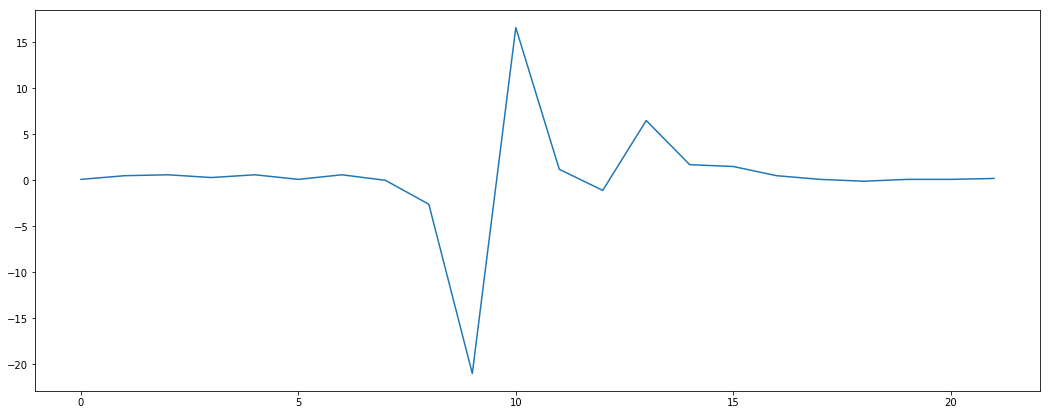

In [211]:
gdp_df = pd.read_csv('series-260823 - GDP.csv')[258:].reset_index()
gdp_df = gdp_df.rename(columns={'Title':'Quarter', 'Gross Domestic Product: Quarter on Quarter growth: CVM SA %':'GDP'})
del gdp_df['index']
gdp_df['GDP'] = pd.to_numeric(gdp_df['GDP'])
gdp_df['GDP'].plot()

### FTSE 100

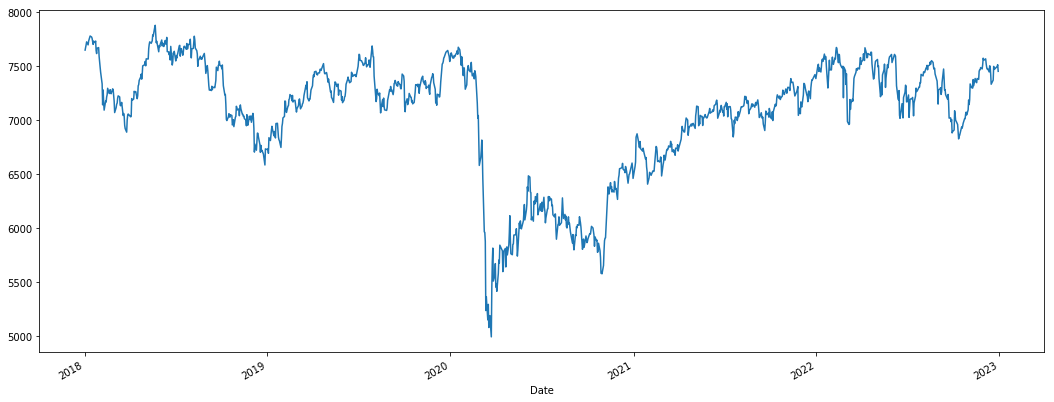

In [213]:
get_yf_data('^FTSE', '2018-01-01', '2022-12-31', 'Close').plot()

### Unemployment

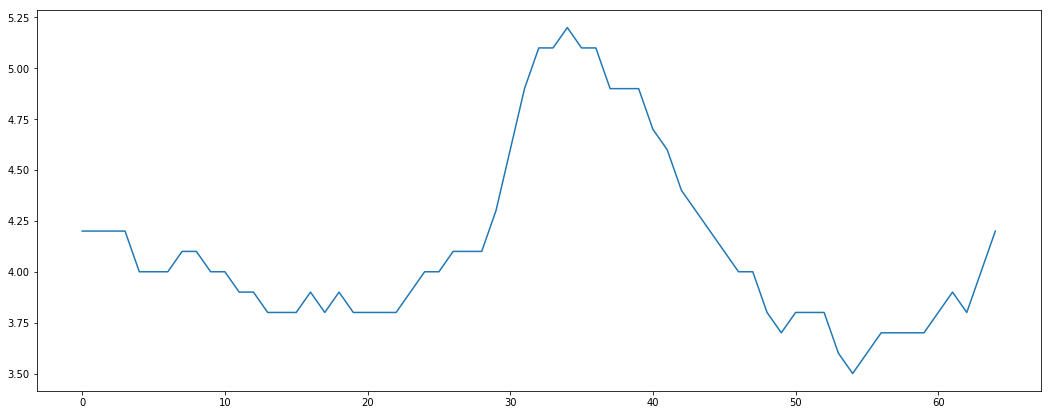

In [221]:
unemp_df = pd.read_csv('series-280823 - unemployment.csv')[832:].reset_index()
del unemp_df['index']
unemp_df = unemp_df.rename(columns={'Title':'Month', 'Unemployment rate (aged 16 and over, seasonally adjusted): %':'Unemp'})
unemp_df['Unemp'] = pd.to_numeric(unemp_df['Unemp'])
unemp_df['Unemp'].plot()

In [ ]:
hwg = pd.DataFrame(stocks['HWG.L'])
hwg['Date'] = hwg.index
res = pd.merge(hwg.assign(grouper=hwg['Date'].dt.to_period('M')),
               inflation_df.assign(grouper=inflation_df['Month'].dt.to_period('M')),
               how='left', on='grouper')

res = res[['Date', 'Close', 'CPIH Annual Rate']]
res.index = res['Date']
del res['Date']

res['CPIH Annual Rate'] = pd.to_numeric(res['CPIH Annual Rate'])#.dtypes#.plot()